# Численные схемы для одномерного уравнения переноса
$$
\frac{\partial \phi}{\partial t} + u\frac{\partial \phi}{\partial x}=0
$$

In [2]:
#-ПОДКЛЮЧЕНИЕ-МОДУЛЕЙ-И-БИБЛИОТЕК-
%matplotlib notebook

import numpy              as np
import scipy
import matplotlib.pyplot  as plt
import glob
import moviepy.editor     as mpy

from scipy                import sparse
from scipy.sparse         import linalg
from numpy                import pi, sin, cos, ma
from pylab                import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib           import cm
from matplotlib.ticker    import LinearLocator, FormatStrFormatter
from matplotlib           import animation

In [45]:
#-ИНИЦИАЛИЗАЦИЯ-СЕТКИ-И-ПАРАМЕТРОВ-ЗАДАЧИ-
x_max   = 1
t_max   = 2
count_x = 100
count_t = 1000
h      = (x_max)/count_x
tau    = (t_max)/count_t

x     = np.linspace(0,x_max,count_x)  #Сетки
t     = np.linspace(0,t_max,count_t)
PHI   = np.zeros((t.size,x.size))

def u_func(x1):   
    return 1

u = np.zeros(x.size)
for i in range(x.size):
        u[i] = u_func(x[i])
        
#Для пердварительной оценки
print("Число Куранта:")
u[0]*tau/h

Число Куранта:


0.2

---
### 1. Схемы для уравнения переноса с фиксированными граничными условиями

##### 1.1. Левая направленная разность
$$
\frac{\phi_{i}^{j+1}-\phi_{i}^{j}}{\tau} +u\frac{\phi_{i}^{j}-\phi_{i-1}^{j}}{h}=0\\
\phi_{i}^{j+1} = \phi_{i}^{j}-\tau u\frac{\phi_{i}^{j}-\phi_{i-1}^{j}}{h}
$$

* Устойчивая схема при выполнении условия Куранта $\frac{\tau u}{h}\leq 1$
* $l_2$-норма решения со временем убывает

In [46]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = sin(x*pi*2)

PHI[0,:] = SC
PHI[:,0] = BC1

In [47]:
#-ОПЕРАТОР-ПРОСТРАСНТВЕННОГО-ДИФФЕРЕНЦИРОВАНИЯ-ДЛЯ-ЛЕВОЙ-НАПРАВЛЕННОЙ-РАЗНОСТИ-
def SpaceDiff(f):
    A     = np.zeros(f.size)+1
    B     = np.zeros(f.size)-1
    data  = np.array([u[0]/h*B, u[0]/h*A])
    diags = np.array([-1, 0])
    D     = sparse.spdiags(data, diags, f.size, f.size).toarray()
    return D@f

In [48]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] - tau*SpaceDiff(PHI[j,:])

<IPython.core.display.Javascript object>


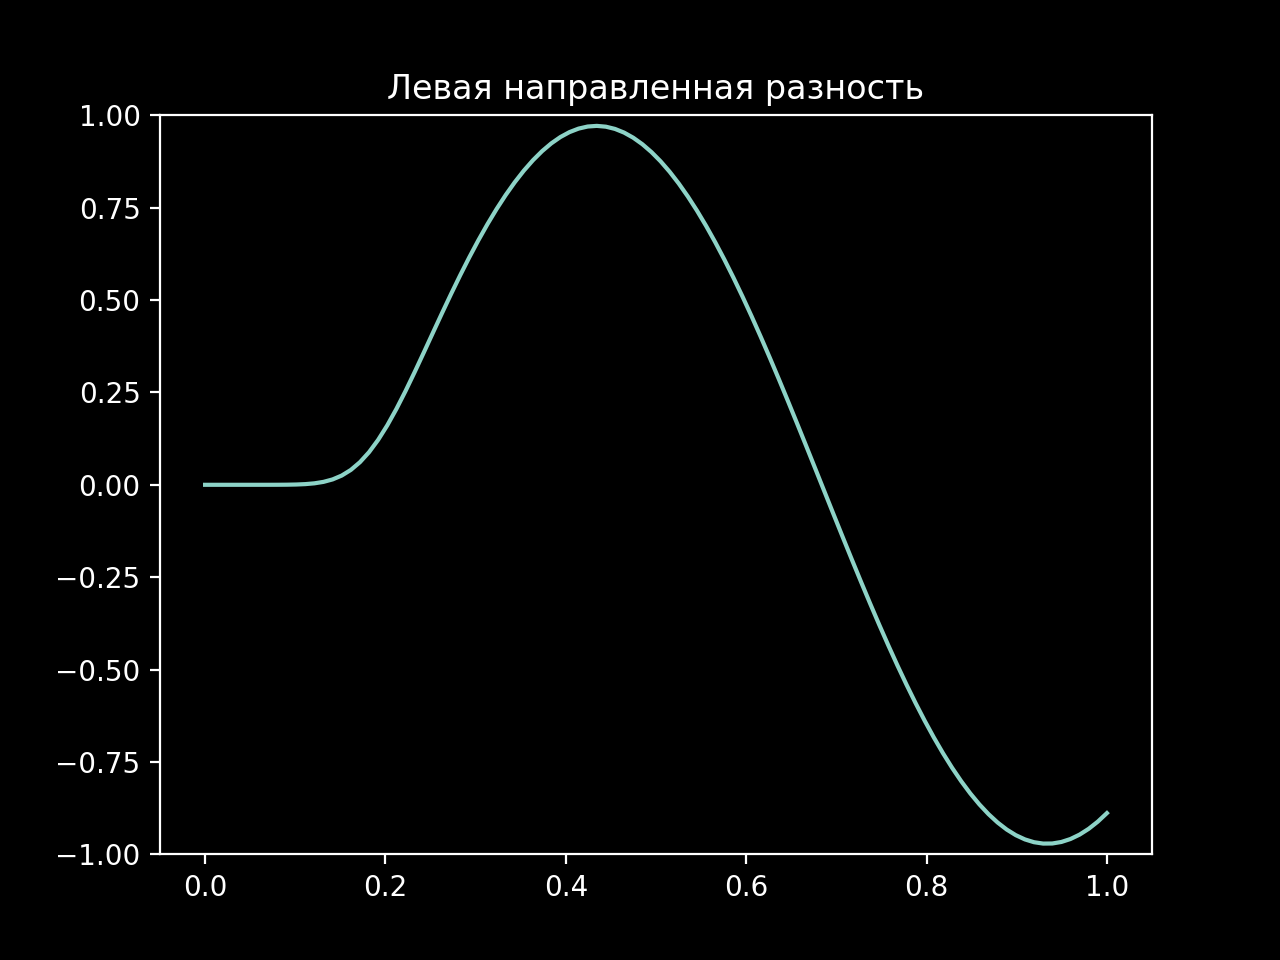

In [49]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Левая направленная разность')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Левая направленная разность')
    ax.set_ylim(-1,1)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 1.2. Центральная разность
$$
\frac{\phi_{i}^{j+1}-\phi_{i}^{j}}{\tau} +u\frac{\phi_{i+1}^{j}-\phi_{i-1}^{j}}{2h}=0\\
\phi_{i}^{j+1} = \phi_{i}^{j} + \tau u \frac{\phi_{i+1}^{j}-\phi_{i-1}^{j}}{2h}
$$
* Неустойчива, появляются сильные осцилляции
* Норма решения возрастает

In [50]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = sin(x*pi*2)

PHI[0,:] = SC
PHI[:,0] = BC1

In [51]:
#-ОПЕРАТОР-ПРОСТРАСНТВЕННОГО-ДИФФЕРЕНЦИРОВАНИЯ-ДЛЯ-ЛЕВОЙ-НАПРАВЛЕННОЙ-РАЗНОСТИ-
def SpaceDiff(f):
    A     = np.zeros(f.size)+1
    B     = np.zeros(f.size)-1
    data  = np.array([u[0]/(2*h)*B, u[0]/(2*h)*A])
    diags = np.array([-1, 1])
    D     = sparse.spdiags(data, diags, f.size, f.size).toarray()
    return D@f

In [52]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] - tau*SpaceDiff(PHI[j,:])

<IPython.core.display.Javascript object>


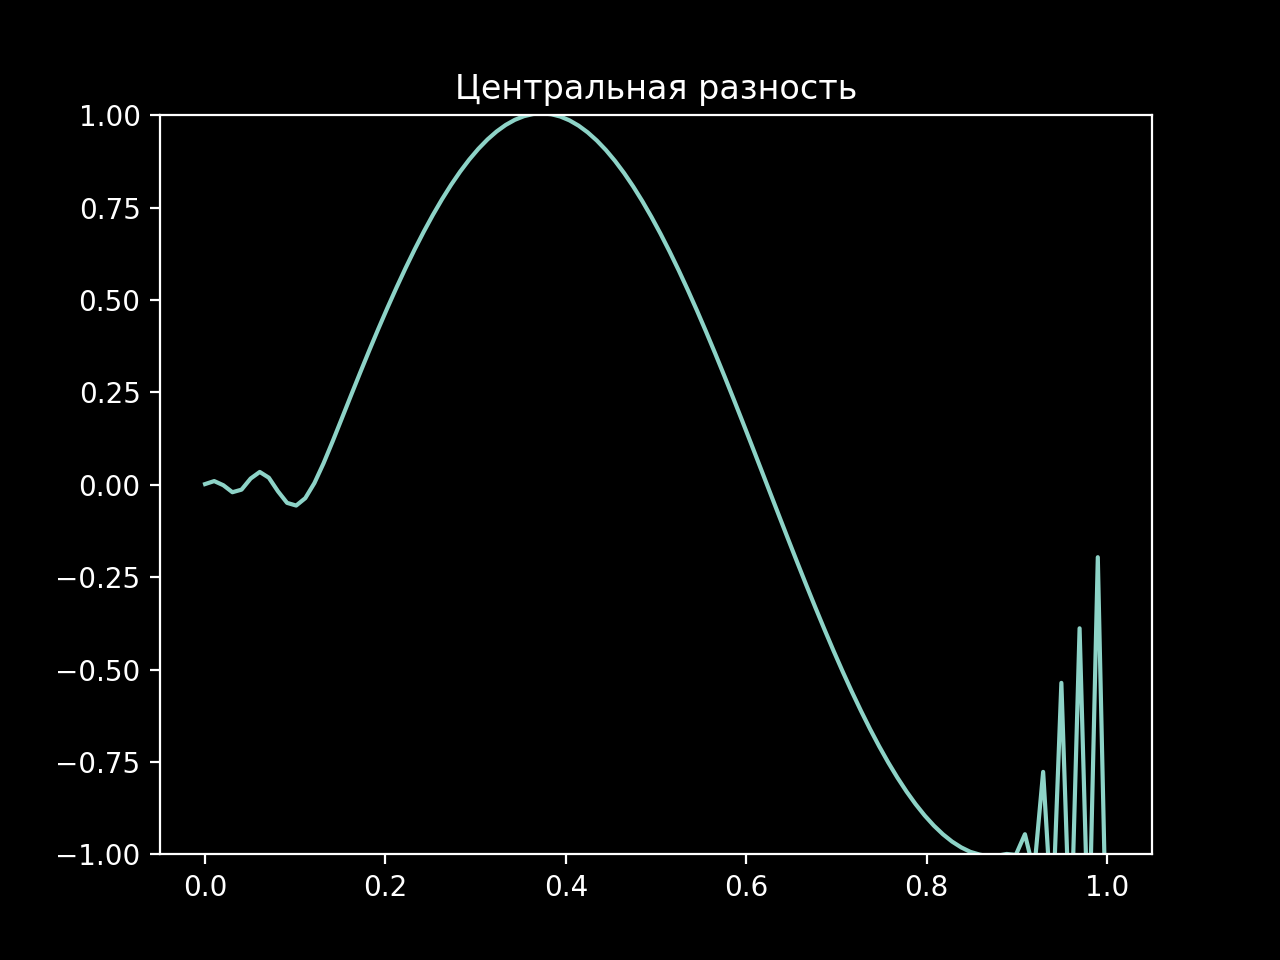

In [53]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Центральная разность')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Центральная разность')
    ax.set_ylim(-1,1)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 1.3. Четыре симметричных узла
$$
\frac{\phi_{i}^{j+1}-\phi_{i}^{j}}{\tau} +u\frac{-\phi_{i+2}^{j}+8\phi_{i+1}^{j}-8\phi_{i-1}^{j}+\phi_{i-2}^{j}}{12h}=0\\
\phi_{i}^{j+1} = \phi_{i}^{j} - \tau u \frac{-\phi_{i+2}^{j}+8\phi_{i+1}^{j}-8\phi_{i-1}^{j}+\phi_{i-2}^{j}}{12h}
$$
* Имеются осциляции из-за несогласования начальных и граничных условий
* Наблюдается рост $l_2$-нормы решения

In [54]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = sin(x*pi*2)

PHI[0,:] = SC
PHI[:,0] = BC1

In [55]:
#-ОПЕРАТОР-ПРОСТРАСНТВЕННОГО-ДИФФЕРЕНЦИРОВАНИЯ-ДЛЯ-ЛЕВОЙ-НАПРАВЛЕННОЙ-РАЗНОСТИ-
def SpaceDiff(f):
    A     = np.zeros(f.size)+1
    B     = np.zeros(f.size)-1
    data  = np.array([u[0]/(12*h)*A, 2*u[0]/(3*h)*B, 2*u[0]/(3*h)*A, u[0]/(12*h)*B])
    diags = np.array([-2, -1, 1, 2])
    D     = sparse.spdiags(data, diags, f.size, f.size).toarray()
    return D@f

In [56]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] - tau*SpaceDiff(PHI[j,:])

<IPython.core.display.Javascript object>


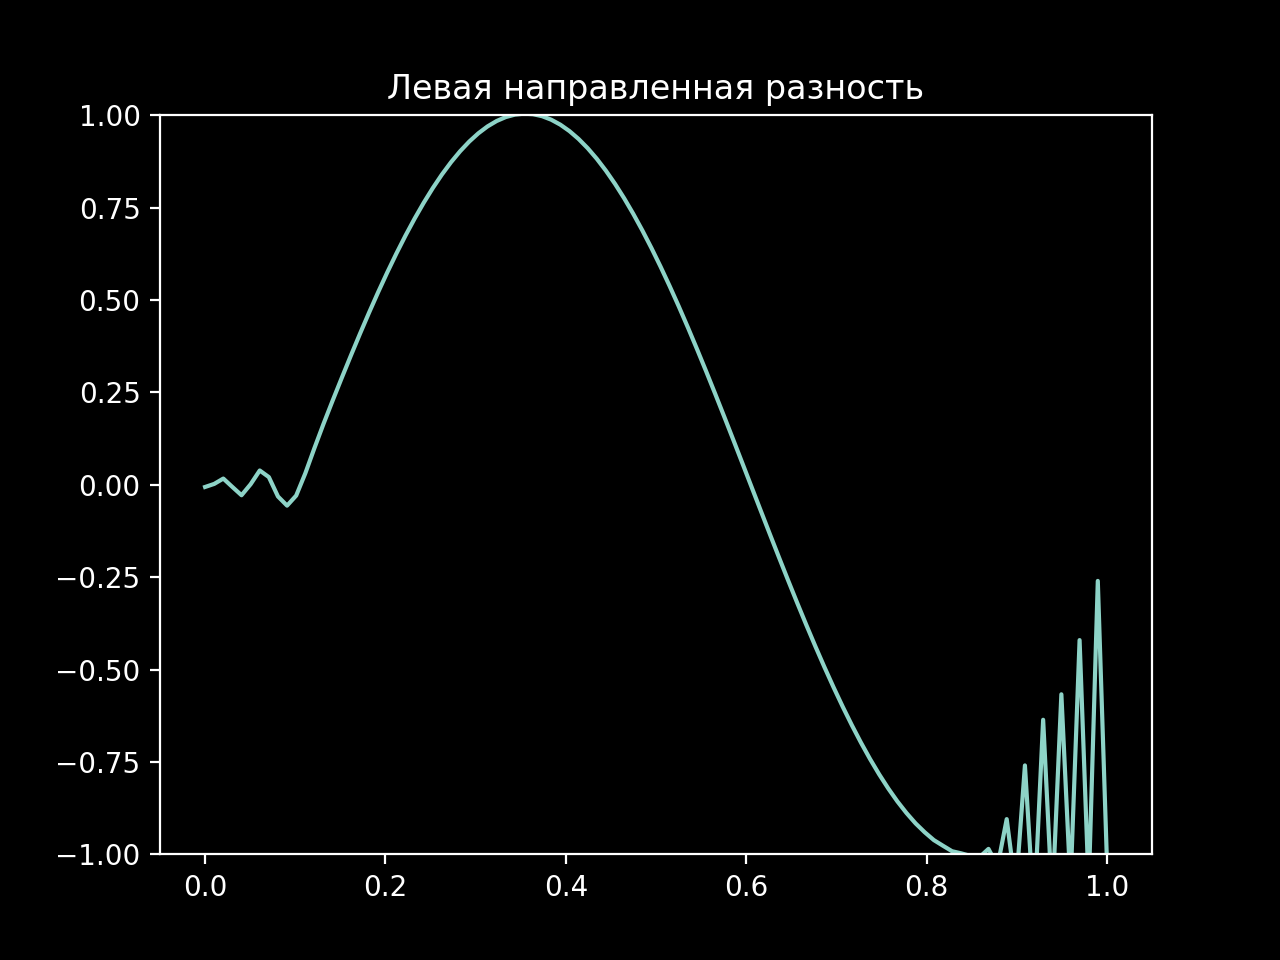

In [57]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Четыре симметричных узла')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Четыре симметричных узла')
    ax.set_ylim(-1,1)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

-----
### 2. Метод виртуальных точек. Зацикливание решения.

In [82]:
#-ИНИЦИАЛИЗАЦИЯ-СЕТКИ-И-ПАРАМЕТРОВ-ЗАДАЧИ-
x_max   = 1
t_max   = 5
count_x = 200
count_t = 1000
h      = (x_max)/count_x
tau    = (t_max)/count_t

x     = np.linspace(0,x_max+2*h,count_x+2)  #Сетки
t     = np.linspace(0,t_max,count_t)
PHI   = np.zeros((t.size,x.size))

def u_func(x1):
    return 1

u = np.zeros(x.size)
for i in range(x.size):
        u[i] = u_func(x[i])
        
print("Число Куранта:")
u[0]*tau/h

Число Куранта:


1.0

##### 2.1. Для левой направленной разности + правой разделенной разности
$$
\frac{\phi_{i}^{j+1}-\phi_{i}^{j}}{\tau} +u\frac{\phi_{i}^{j}-\phi_{i-1}^{j}}{h}=0\\
\phi_{i}^{j+1} = \phi_{i}^{j}-\tau u\frac{\phi_{i}^{j}-\phi_{i-1}^{j}}{h}
$$

In [95]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = zeros(x.size)
SC[1:SC.size-1]  = sin(2*pi*x[0:SC.size-2])

SC[0]         = SC[SC.size-2]
SC[SC.size-1] = SC[1]
PHI[0,:]      = SC

PHI[:,1] = BC1

In [96]:
#-ОПЕРАТОР-ПРОСТРАСНТВЕННОГО-ДИФФЕРЕНЦИРОВАНИЯ-ДЛЯ-ЛЕВОЙ-НАПРАВЛЕННОЙ-РАЗНОСТИ-
#(+)Переодическое продолжение решения

def SpaceDiff(f):
    A     = np.zeros(f.size)+1
    B     = np.zeros(f.size)-1
    data  = np.array([u[0]/h*B, u[0]/h*A])
    diags = np.array([-1, 0])
    D     = sparse.spdiags(data, diags, f.size, f.size).toarray()
    D[0,f.size-1] =   u[0]/(h) #Внесение переодичности методом виртуальных точек
    D[0,f.size-1] =   -u[0]/(h) #Внесение переодичности методом виртуальных точек
    return D@f

In [97]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] - tau*SpaceDiff(PHI[j,:])

<IPython.core.display.Javascript object>


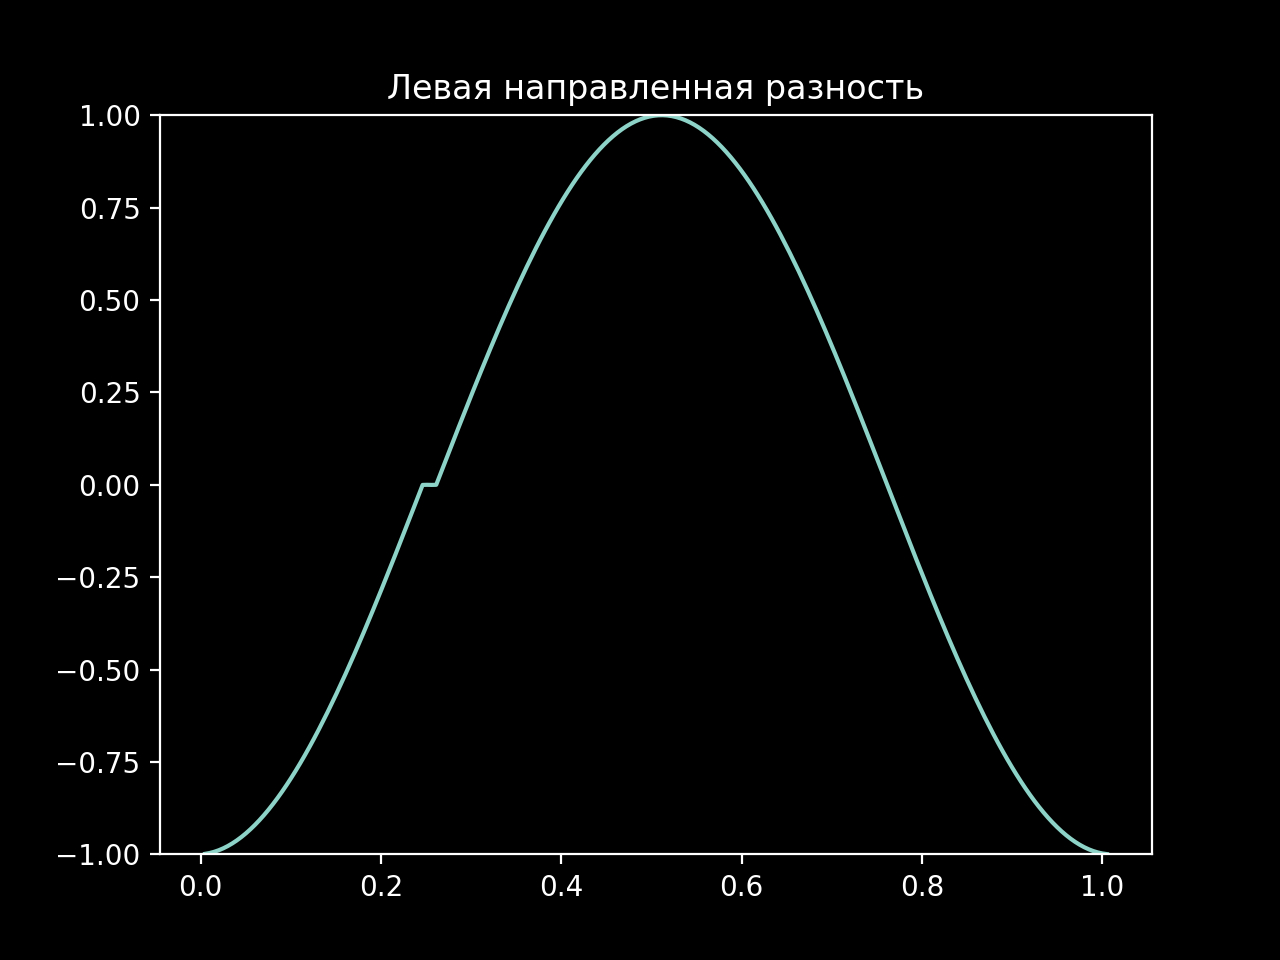

In [98]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Левая направленная разность')
surf = ax.plot(x[1:SC.size-1],PHI[0, 1:SC.size-1])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Левая направленная разность')
    ax.set_ylim(-1,1)
    surf = ax.plot(x[1:SC.size-1],PHI[n, 1:SC.size-1])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 2.2. Для левой направленной разности +  РК4

In [68]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = zeros(x.size)
SC[1:SC.size-1]  = sin(2*pi*x[0:SC.size-2])

SC[0]         = SC[SC.size-2]
SC[SC.size-1] = SC[1]
PHI[0,:]      = SC

PHI[:,1] = BC1

In [69]:
#-РК4+ЛЕВАЯ-НАПРАВЛЕННАЯ-РАЗНОСТЬ-

def F(PHI):
    result = np.zeros(PHI.size)
    for i in range(1,PHI.size-1):
        result[i] = u[0]*(PHI[i-1]-PHI[i])/(2*h)
    result[0] = result[PHI.size-2]
    result[PHI.size-1] = result[1]
    return result

def w1(PHI):
    return F(PHI)

def w2(PHI):
    return F(PHI+tau/2*w1(PHI))

def w3(PHI):
    return F(PHI+tau/2*w2(PHI))

def w4(PHI):
    return F(PHI+tau*w3(PHI))

In [70]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] + tau/6*(w1(PHI[j,:])+2*w2(PHI[j,:])+2*w3(PHI[j,:])+w4(PHI[j,:]))

<IPython.core.display.Javascript object>


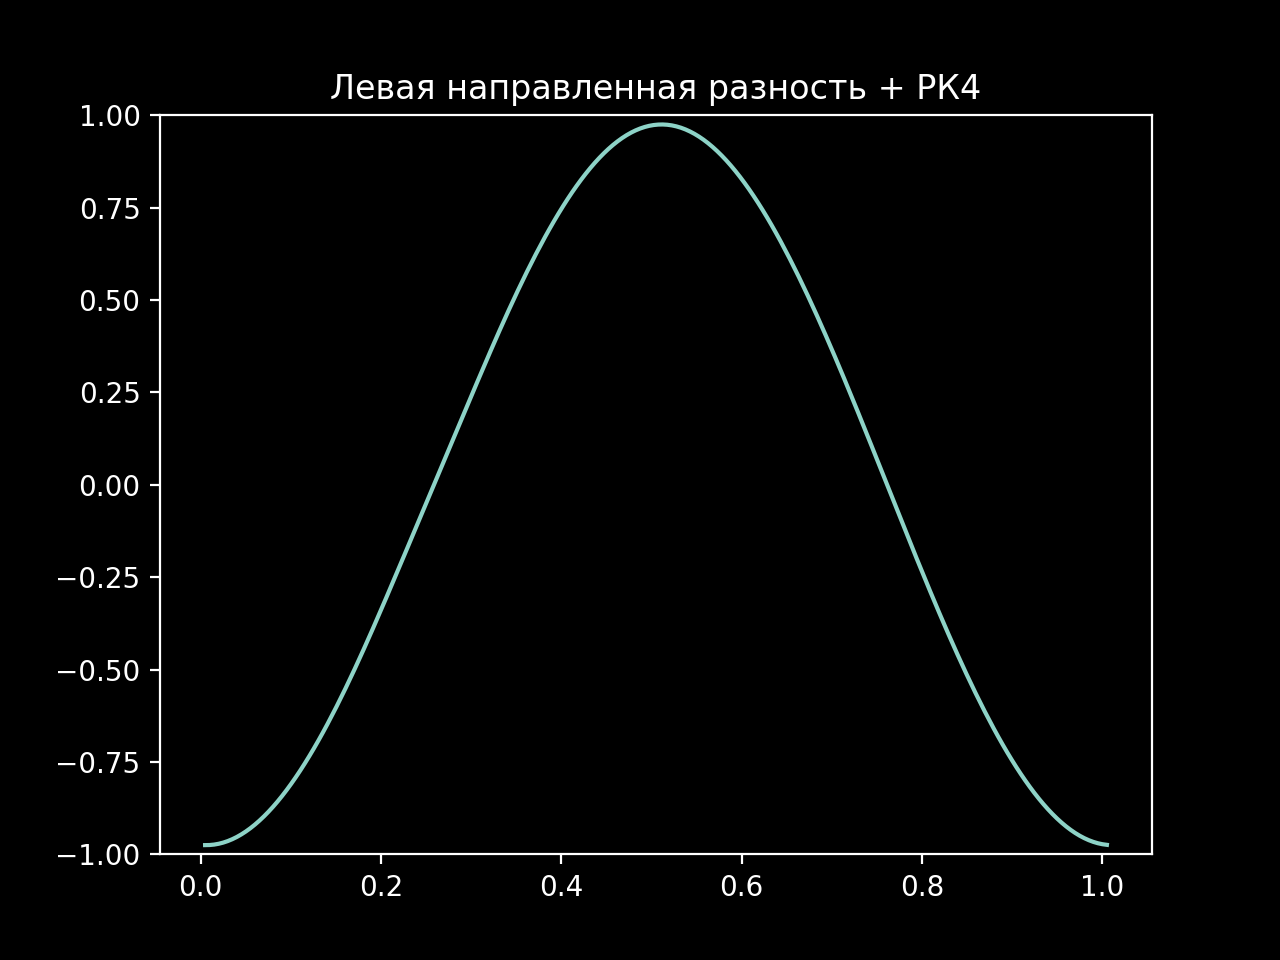

In [71]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Левая направленная разность + РК4')
surf = ax.plot(x[1:SC.size-1],PHI[0, 1:SC.size-1])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Левая направленная разность + РК4')
    ax.set_ylim(-1,1)
    surf = ax.plot(x[1:SC.size-1],PHI[n, 1:SC.size-1])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 2.3. Для центральная разности +  РК4

In [63]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = zeros(x.size)
SC[1:SC.size-1]  = sin(2*pi*x[0:SC.size-2])

SC[0]         = SC[SC.size-2]
SC[SC.size-1] = SC[1]
PHI[0,:]      = SC

PHI[:,1] = BC1

In [64]:
#-РК4+ЦЕНТРАЛЬНАЯ-РАЗНОСТЬ-

def F(PHI):
    result = np.zeros(PHI.size)
    for i in range(1,PHI.size-1):
        result[i] = u[0]*(PHI[i-1]-PHI[i+1])/(2*h)
    result[0] = result[PHI.size-2]
    result[PHI.size-1] = result[1]
    return result

def w1(PHI):
    return F(PHI)

def w2(PHI):
    return F(PHI+tau/2*w1(PHI))

def w3(PHI):
    return F(PHI+tau/2*w2(PHI))

def w4(PHI):
    return F(PHI+tau*w3(PHI))

In [65]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] + tau/6*(w1(PHI[j,:])+2*w2(PHI[j,:])+2*w3(PHI[j,:])+w4(PHI[j,:]))

<IPython.core.display.Javascript object>


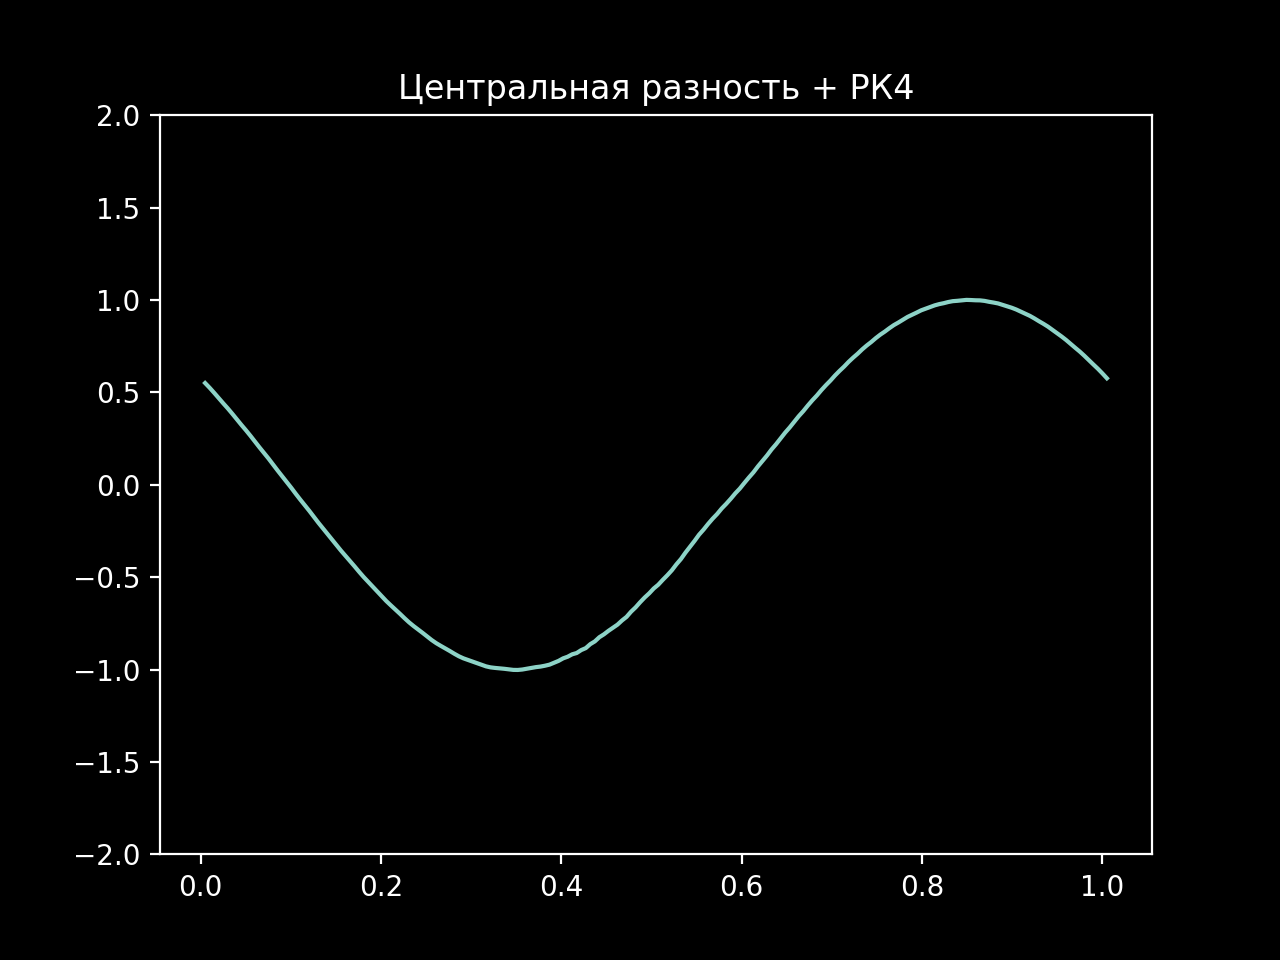

In [67]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Ценральная + РК4')
surf = ax.plot(x[1:SC.size-1],PHI[0, 1:SC.size-1])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Центральная разность + РК4')
    ax.set_ylim(-2,2)
    surf = ax.plot(x[1:SC.size-1],PHI[n, 1:SC.size-1])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 2.4. Четырехточечный шаблон + РК4

In [53]:
#-ИНИЦИАЛИЗАЦИЯ-СЕТКИ-И-ПАРАМЕТРОВ-ЗАДАЧИ-
x_max   = 1
t_max   = 5
count_x = 200
count_t = 1000
h      = (x_max)/count_x
tau    = (t_max)/count_t

x     = np.linspace(0,x_max+4*h,count_x+4)  #Сетки +4 вируальных точки
t     = np.linspace(0,t_max,count_t)
PHI   = np.zeros((t.size,x.size))

def u_func(x1):
    return 1

u = np.zeros(x.size)
for i in range(x.size):
        u[i] = u_func(x[i])
        
print("Число Куранта:")
u[0]*tau/h

Число Куранта:


1.0

In [54]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = zeros(x.size)
SC[2:SC.size-2]  = sin(2*pi*x[0:SC.size-4])

SC[0]         = SC[SC.size-4]
SC[1]         = SC[SC.size-3]
SC[SC.size-1] = SC[3]
SC[SC.size-2] = SC[2]
PHI[0,:]      = SC

PHI[:,1] = BC1

In [55]:
#-РК4+ЧЕТЫРЕХТОЧЕЧНЫЙ-ШАБЛОН-

def F(PHI):
    result = np.zeros(PHI.size)
    for i in range(2,PHI.size-2):
        result[i] = u[0]*(PHI[i+2]-8*PHI[i+1]+8*PHI[i-1]-PHI[i-2])/(12*h)
    result[0]          = result[PHI.size-4]
    result[1]          = result[PHI.size-3]
    result[PHI.size-2] = result[2]
    result[PHI.size-1] = result[3]
    return result

def w1(PHI):
    return F(PHI)

def w2(PHI):
    return F(PHI+tau/2*w1(PHI))

def w3(PHI):
    return F(PHI+tau/2*w2(PHI))

def w4(PHI):
    return F(PHI+tau*w3(PHI))

In [56]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] + tau/6*(w1(PHI[j,:])+2*w2(PHI[j,:])+2*w3(PHI[j,:])+w4(PHI[j,:]))

<IPython.core.display.Javascript object>


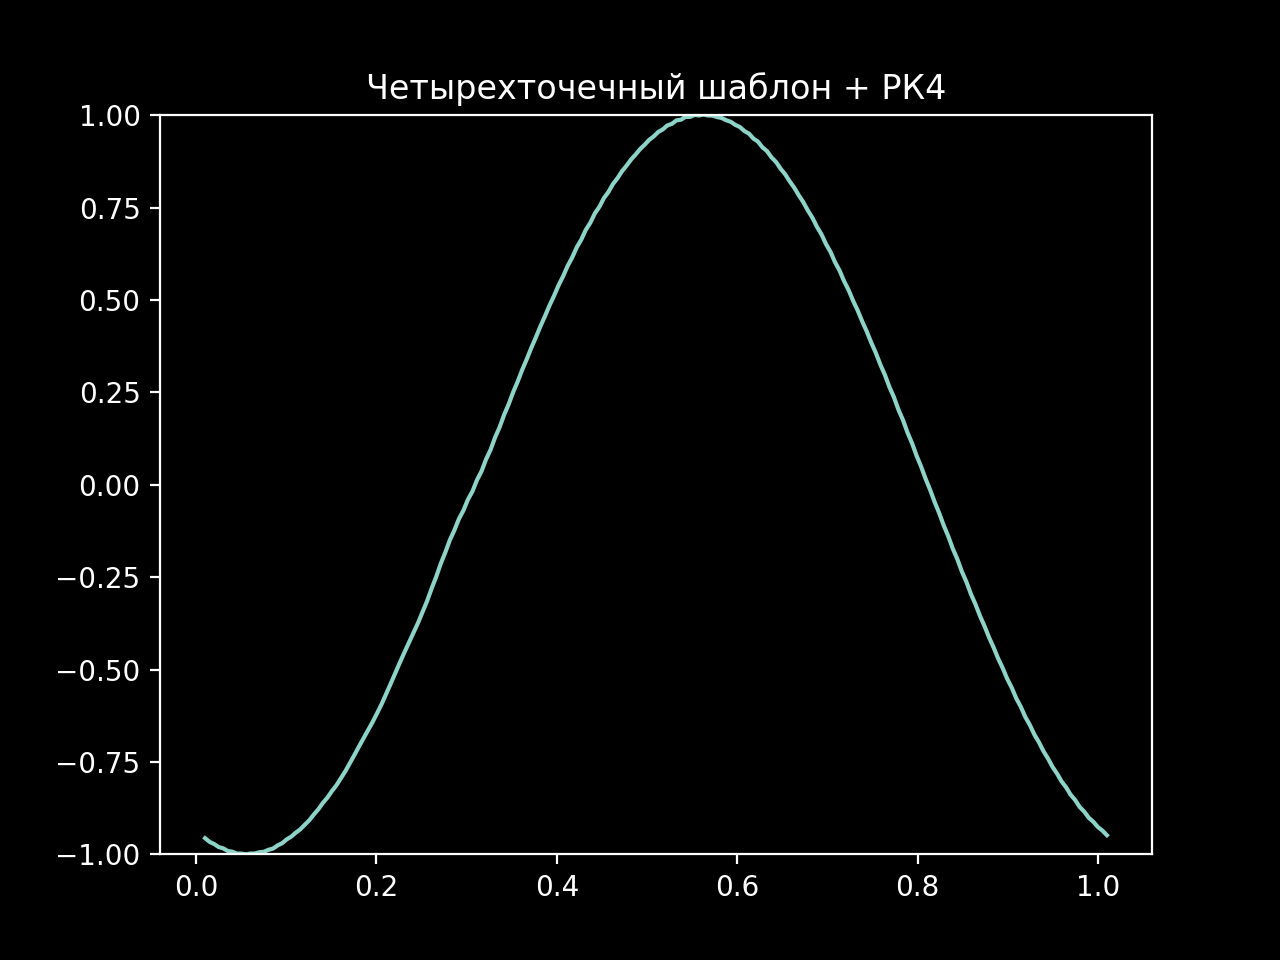

In [57]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Четырехточечный шаблон + РК4')
surf = ax.plot(x[2:SC.size-2],PHI[0, 2:SC.size-2])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Четырехточечный шаблон + РК4')
    ax.set_ylim(-1,1)
    surf = ax.plot(x[2:SC.size-2],PHI[n, 2:SC.size-2])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

-------
### 3. Входное воздействие - прямоугольный импульс

##### 3.1. Центральная разность + РК4

In [83]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = zeros(x.size)
SC[80:SC.size-80]  = np.ones((1,SC[80:SC.size-80].size))

SC[0]         = SC[SC.size-2]
SC[SC.size-1] = SC[1]
PHI[0,:]      = SC

PHI[:,1] = BC1

In [84]:
#-РК4+ЦЕНТРАЛЬНАЯ-РАЗНОСТЬ-

def F(PHI):
    result = np.zeros(PHI.size)
    for i in range(1,PHI.size-1):
        result[i] = u[0]*(PHI[i-1]-PHI[i])/(h)
    result[0] = result[PHI.size-2]
    result[PHI.size-1] = result[1]
    return result

def w1(PHI):
    return F(PHI)

def w2(PHI):
    return F(PHI+tau/2*w1(PHI))

def w3(PHI):
    return F(PHI+tau/2*w2(PHI))

def w4(PHI):
    return F(PHI+tau*w3(PHI))

In [85]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] + tau/6*(w1(PHI[j,:])+2*w2(PHI[j,:])+2*w3(PHI[j,:])+w4(PHI[j,:]))

<IPython.core.display.Javascript object>


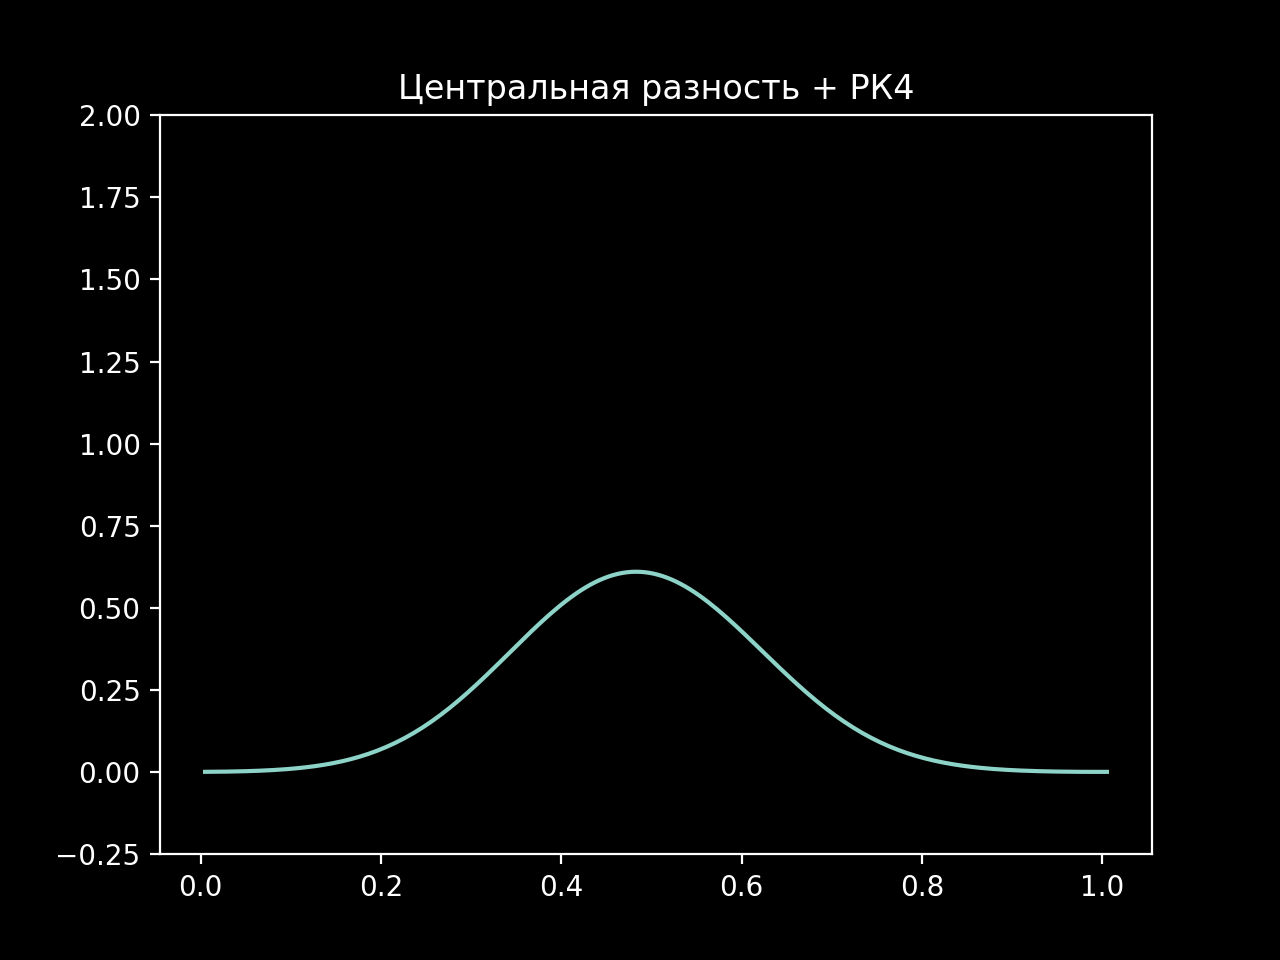

In [86]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Ценральная + РК4')
surf = ax.plot(x[1:SC.size-1],PHI[0, 1:SC.size-1])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Центральная разность + РК4')
    ax.set_ylim(-0.25,2)
    surf = ax.plot(x[1:SC.size-1],PHI[n, 1:SC.size-1])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 3.2. Четырехузловая схема + РК4

In [77]:
#-ИНИЦИАЛИЗАЦИЯ-СЕТКИ-И-ПАРАМЕТРОВ-ЗАДАЧИ-
x_max   = 1
t_max   = 5
count_x = 200
count_t = 1000
h      = (x_max)/count_x
tau    = (t_max)/count_t

x     = np.linspace(0,x_max+4*h,count_x+4)  #Сетки +4 вируальных точки
t     = np.linspace(0,t_max,count_t)
PHI   = np.zeros((t.size,x.size))

def u_func(x1):
    return 1

u = np.zeros(x.size)
for i in range(x.size):
        u[i] = u_func(x[i])
        
print("Число Куранта:")
u[0]*tau/h

Число Куранта:


1.0

In [78]:
#-ГРАНИЧНЫЕ-И-НАЧАЛЬНЫЕ-УСЛОВИЯ-
BC1 = zeros(t.size)
SC  = zeros(x.size)
SC[80:SC.size-80]  = np.ones((1,SC[80:SC.size-80].size))

SC[0]         = SC[SC.size-4]
SC[1]         = SC[SC.size-3]
SC[SC.size-1] = SC[3]
SC[SC.size-2] = SC[2]
PHI[0,:]      = SC

PHI[:,1] = BC1

In [79]:
#-РК4+ЧЕТЫРЕХТОЧЕЧНЫЙ-ШАБЛОН-

def F(PHI):
    result = np.zeros(PHI.size)
    for i in range(2,PHI.size-2):
        result[i] = u[0]*(PHI[i+2]-8*PHI[i+1]+8*PHI[i-1]-PHI[i-2])/(12*h)
    result[0]          = result[PHI.size-4]
    result[1]          = result[PHI.size-3]
    result[PHI.size-2] = result[2]
    result[PHI.size-1] = result[3]
    return result

def w1(PHI):
    return F(PHI)

def w2(PHI):
    return F(PHI+tau/2*w1(PHI))

def w3(PHI):
    return F(PHI+tau/2*w2(PHI))

def w4(PHI):
    return F(PHI+tau*w3(PHI))

In [80]:
#-ВЫЧИСЛЕНИЯ-
for j in range(t.size-1):
    PHI[j+1,:] = PHI[j,:] + tau/6*(w1(PHI[j,:])+2*w2(PHI[j,:])+2*w3(PHI[j,:])+w4(PHI[j,:]))

<IPython.core.display.Javascript object>


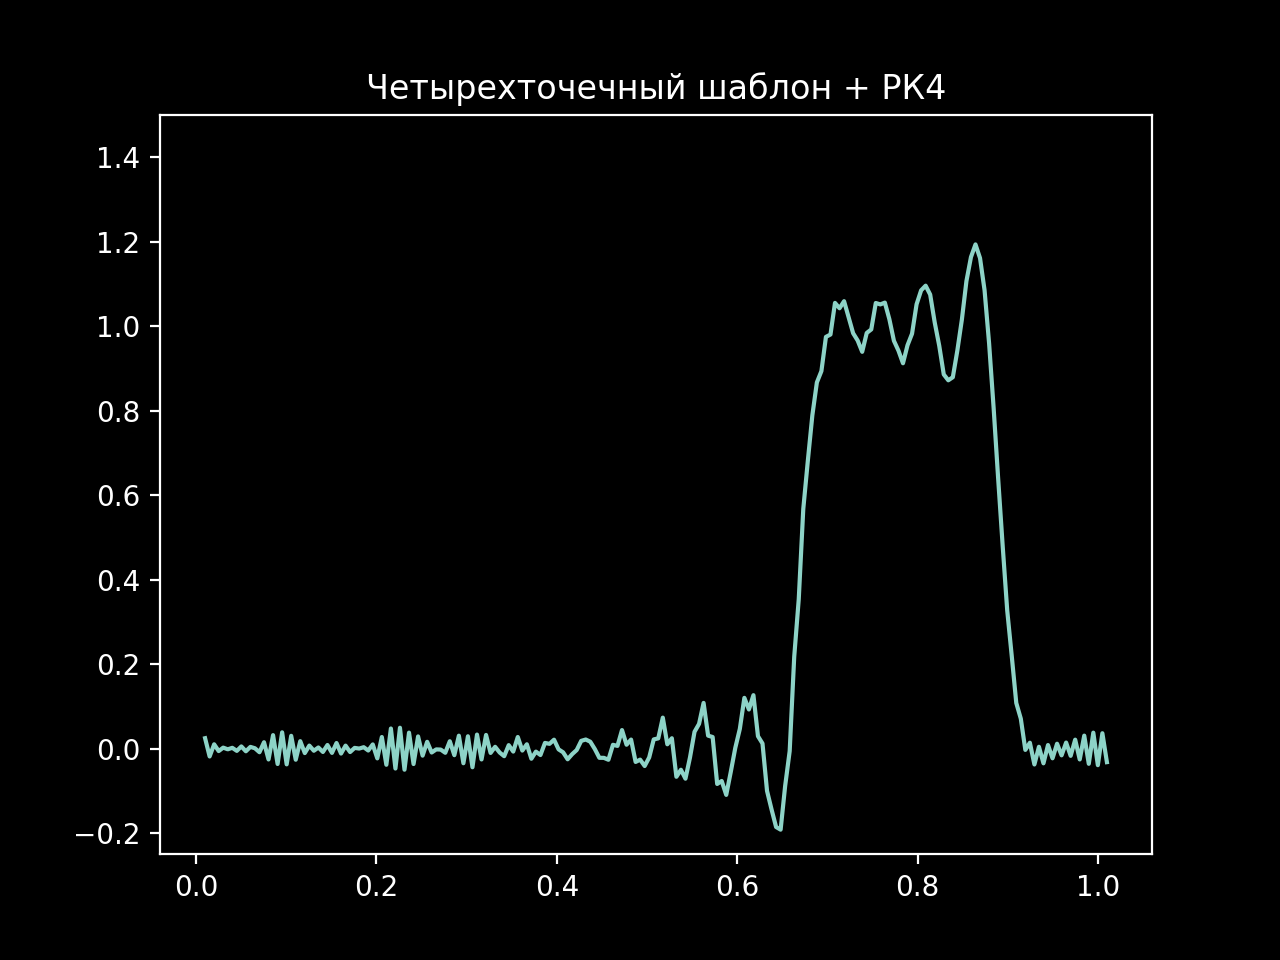

In [81]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
ax.set_title('Четырехточечный шаблон + РК4')
surf = ax.plot(x[2:SC.size-2],PHI[0, 2:SC.size-2])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_title('Четырехточечный шаблон + РК4')
    ax.set_ylim(-0.25,1.5)
    surf = ax.plot(x[2:SC.size-2],PHI[n, 2:SC.size-2])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)